In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline #相当于展示的更加方便 不用再show出来了

UsageError: unrecognized arguments: #相当于展示的更加方便 不用再show出来了


In [6]:
 img = cv2.imread('/Users/qiaoye/Desktop/3.jpeg')

In [7]:
img.shape #读取BGR格式

(480, 720, 3)

In [ ]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destoryAllWindows()

### 数据读取-视频


- cv2.VideoCapture可以捕获摄像头，用数字控制不同设备
- 如果是视频文件可以直接指定路径即可

In [ ]:
vc = cv2.VideoCapture('/Users/qiaoye/Desktop/课件与答案/video.mp4')

In [ ]:
# 检查视频是否打开
if vc.isOpened():
    open,frame = vc.read()  # 首先读出第一帧，赋值给frame open返回的是TRUE
else:
    open = False

In [ ]:
while open:
    ret,frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('result',gray)
        if cv2.waitKey(1) & 0xFF == 27:
            break
            
vc.release()
cv2.destroyAllWindows()

**截取部分图像数据**

In [ ]:
img = cv2.imread('/Users/qiaoye/Desktop/课件与答案 2/柿子.jpg')
cat = img[0:200,0:200]
cv_show('cat',cat)

#### 颜色通道的提取

In [ ]:
b,g,r = cv2.split(img)
b

In [ ]:
img = cv2.merge((b,g,r))
img.shape

In [ ]:
# 只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)

### 边界填充

In [ ]:
top_size,bottom_size,left_size,right_size = (50,50,50,50) 
replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size, borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT_101)


### 数值计算

In [4]:
img_cat = img


In [5]:
img_cat2 = img_cat + 10
img_cat

array([[[48, 47, 26],
        [49, 48, 27],
        [49, 49, 25],
        ...,
        [56, 67, 59],
        [57, 64, 59],
        [57, 64, 59]],

       [[49, 48, 27],
        [50, 50, 26],
        [50, 50, 26],
        ...,
        [57, 67, 61],
        [57, 64, 59],
        [55, 64, 54]],

       [[50, 50, 26],
        [50, 50, 26],
        [50, 49, 28],
        ...,
        [55, 65, 59],
        [57, 64, 59],
        [57, 64, 59]],

       ...,

       [[55, 66, 58],
        [55, 65, 59],
        [56, 67, 65],
        ...,
        [49, 50, 30],
        [49, 50, 30],
        [49, 50, 30]],

       [[52, 64, 58],
        [51, 62, 59],
        [54, 65, 63],
        ...,
        [49, 50, 30],
        [49, 50, 30],
        [49, 50, 30]],

       [[55, 66, 64],
        [52, 64, 58],
        [54, 61, 56],
        ...,
        [49, 50, 30],
        [49, 50, 30],
        [49, 50, 30]]], dtype=uint8)

In [6]:
img_cat2

array([[[58, 57, 36],
        [59, 58, 37],
        [59, 59, 35],
        ...,
        [66, 77, 69],
        [67, 74, 69],
        [67, 74, 69]],

       [[59, 58, 37],
        [60, 60, 36],
        [60, 60, 36],
        ...,
        [67, 77, 71],
        [67, 74, 69],
        [65, 74, 64]],

       [[60, 60, 36],
        [60, 60, 36],
        [60, 59, 38],
        ...,
        [65, 75, 69],
        [67, 74, 69],
        [67, 74, 69]],

       ...,

       [[65, 76, 68],
        [65, 75, 69],
        [66, 77, 75],
        ...,
        [59, 60, 40],
        [59, 60, 40],
        [59, 60, 40]],

       [[62, 74, 68],
        [61, 72, 69],
        [64, 75, 73],
        ...,
        [59, 60, 40],
        [59, 60, 40],
        [59, 60, 40]],

       [[65, 76, 74],
        [62, 74, 68],
        [64, 71, 66],
        ...,
        [59, 60, 40],
        [59, 60, 40],
        [59, 60, 40]]], dtype=uint8)

> 相当于所有位置都加上了个10

In [7]:
(img_cat + img_cat2)

array([[[106, 104,  62],
        [108, 106,  64],
        [108, 108,  60],
        ...,
        [122, 144, 128],
        [124, 138, 128],
        [124, 138, 128]],

       [[108, 106,  64],
        [110, 110,  62],
        [110, 110,  62],
        ...,
        [124, 144, 132],
        [124, 138, 128],
        [120, 138, 118]],

       [[110, 110,  62],
        [110, 110,  62],
        [110, 108,  66],
        ...,
        [120, 140, 128],
        [124, 138, 128],
        [124, 138, 128]],

       ...,

       [[120, 142, 126],
        [120, 140, 128],
        [122, 144, 140],
        ...,
        [108, 110,  70],
        [108, 110,  70],
        [108, 110,  70]],

       [[114, 138, 126],
        [112, 134, 128],
        [118, 140, 136],
        ...,
        [108, 110,  70],
        [108, 110,  70],
        [108, 110,  70]],

       [[120, 142, 138],
        [114, 138, 126],
        [118, 132, 122],
        ...,
        [108, 110,  70],
        [108, 110,  70],
        [108, 110,  70]]

**取值范围为[0,255] 当相加结果大于255的时候就越界了，显示的减去255的余数**

In [8]:
cv2.add(img_cat,img_cat2)

array([[[106, 104,  62],
        [108, 106,  64],
        [108, 108,  60],
        ...,
        [122, 144, 128],
        [124, 138, 128],
        [124, 138, 128]],

       [[108, 106,  64],
        [110, 110,  62],
        [110, 110,  62],
        ...,
        [124, 144, 132],
        [124, 138, 128],
        [120, 138, 118]],

       [[110, 110,  62],
        [110, 110,  62],
        [110, 108,  66],
        ...,
        [120, 140, 128],
        [124, 138, 128],
        [124, 138, 128]],

       ...,

       [[120, 142, 126],
        [120, 140, 128],
        [122, 144, 140],
        ...,
        [108, 110,  70],
        [108, 110,  70],
        [108, 110,  70]],

       [[114, 138, 126],
        [112, 134, 128],
        [118, 140, 136],
        ...,
        [108, 110,  70],
        [108, 110,  70],
        [108, 110,  70]],

       [[120, 142, 138],
        [114, 138, 126],
        [118, 132, 122],
        ...,
        [108, 110,  70],
        [108, 110,  70],
        [108, 110,  70]]

**cv中的加法和 numpy中的加法不同，对于越界的行为，显示成255，对于在[0,255]之间的数字的话显示的是本身**

## 图像融合

- 做两张图像融合的时候必须保证两张图像的`shape`是相同的

In [ ]:
cv2.resize() ## 可以对图像的大小进行调整

In [9]:
img_1 = cv2.imread('/Users/qiaoye/Desktop/1.jpeg')

In [10]:
img_1.shape

(800, 600, 3)

In [20]:
img_tiaozheng = cv2.resize(img_cat,(600,800))  #宽在前 高在后

In [21]:
img_tiaozheng.shape
#img_1.shape

(800, 600, 3)

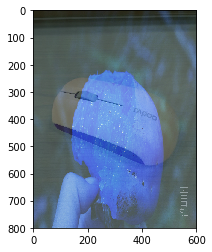

In [22]:
res = cv2.addWeighted(img_1,0.4,img_tiaozheng,0.6,0) 
plt.imshow(res)

addweighted （图片1，图片1的权重，图片2，图片2的权重，偏移量）

In [8]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


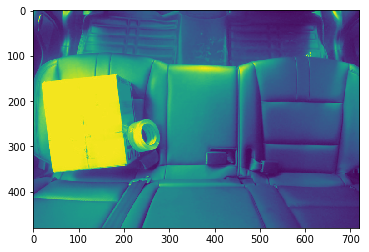

In [10]:
plt.imshow(gray_img)

In [12]:
cv2.imwrite('gray_img.jpg',gray_img)

True